In [1]:
# Import Libraries
import os
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Clenup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

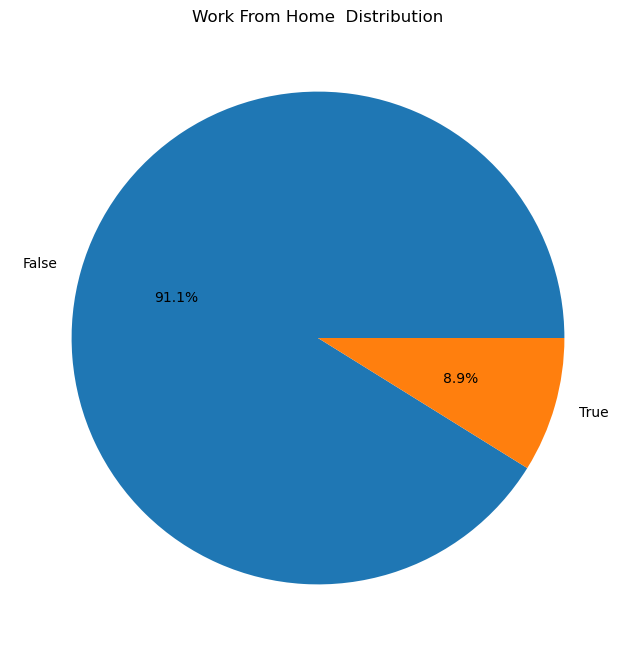

In [9]:
df['job_work_from_home'].value_counts().plot(kind='pie', title='Work From Home  Distribution', autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel('')
plt.show()


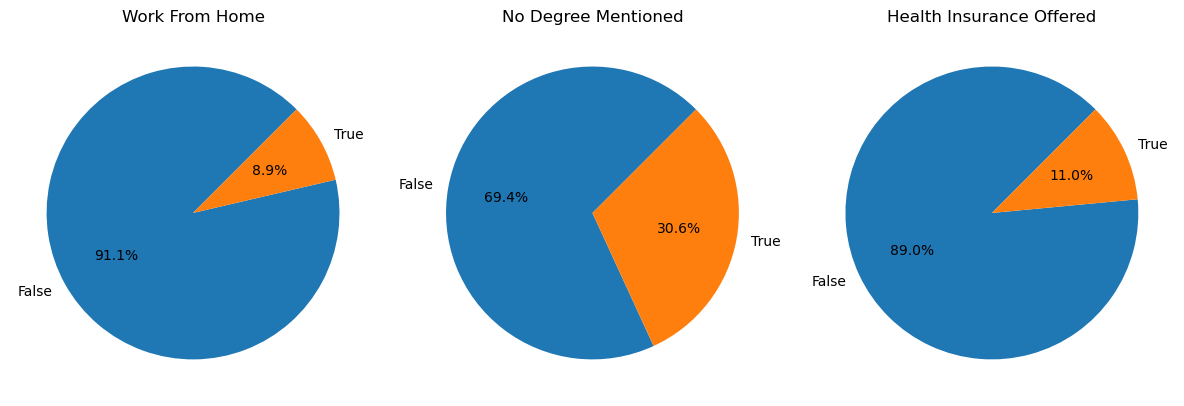

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

# Define column info and value label mappings
column_info = [
    ('job_work_from_home', 'Work From Home', {1: 'Yes', 0: 'No', True: 'Yes', False: 'No'}),
    ('job_no_degree_mention', 'No Degree Mentioned', {1: 'Yes', 0: 'No', True: 'Yes', False: 'No'}),
    ('job_health_insurance', 'Health Insurance Offered', {1: 'Yes', 0: 'No', True: 'Yes', False: 'No'})
]

for i, (column, title, value_map) in enumerate(column_info):
    if column in df.columns:
        value_counts = df[column].value_counts()
        # Map values to descriptive labels
        labels = [value_map.get(val, str(val)) for val in value_counts.index]
        ax[i].pie(value_counts, labels=['False', 'True'], autopct='%1.1f%%', startangle=45)
        ax[i].set_title(title)
    else:
        print(f"Warning: Column '{column}' not found in DataFrame.")

plt.tight_layout()
plt.show()